# Introducción 

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con el cliente basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un cliente se haya ido: puede que se vaya de puntillas.

# Objetivo:  
Analizar y elaborar una estrategia de retención de clientes.

# Etapas 
 
El proyecto consistirá en cinco etapas:
 1. Descargar los datos y prepáralos para el análisis
 2. Análisis exploratorio de datos (EDA)
 3. Construir un modelo para predecir la cancelación de usuarios
 4. Crear clústeres de usuarios
 5. Conclusión 

# Descripción  de los datos:

Model Fitness te aportó archivos CSV que contenían los datos sobre cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

- 'Churn' — la cancelación para el mes en cuestión
- Campos de dataset actuales:
- Datos de usuario del mes anterior
- 'gender'
- 'Near_Location' — si el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio
- 'Partner' — si el usuario es un trabajador de una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes)

- Promo_friends — si el usuario originalmente se inscribió mediante una oferta "trae a un amigo" (se utilizó el código promocional de un amigo cuando pagaron el primer abono)
- 'Phone' — si el usuario aportó el número de teléfono
- 'Age'
- 'Lifetime' — el tiempo (en meses) desde que el usuario llegó por primera vez al gimnasio

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía

- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato
- 'Group_visits' — si el usuario participa en sesiones grupales
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.


# Etapa 1. Abrir los archivo con los datos y estudiar la información general

In [ ]:
# Librerias a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import factorial
from scipy import stats as st
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import chi2_contingency

In [ ]:
# Carga de archivos 
try:
    gym = pd.read_csv('/content/gym_churn_us.csv')
    
except:
    gym = pd.read_csv('/content/gym_churn_us.csv')

In [ ]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [ ]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [ ]:
gym.isnull().any()

gender                               False
Near_Location                        False
Partner                              False
Promo_friends                        False
Phone                                False
Contract_period                      False
Group_visits                         False
Age                                  False
Avg_additional_charges_total         False
Month_to_end_contract                False
Lifetime                             False
Avg_class_frequency_total            False
Avg_class_frequency_current_month    False
Churn                                False
dtype: bool

In [ ]:
print(gym.shape)
gym.dropna(inplace = True)
print(gym.shape)

(4000, 14)
(4000, 14)


In [ ]:
gym.duplicated().sum()

0

In [ ]:
gym.columns = gym.columns.str.lower()
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


 # Etapa 2 Llevar a cabo el análisis exploratorio de datos (EDA)

**Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).**

In [ ]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [ ]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [ ]:
gym.groupby(['contract_period'])['contract_period'].count()/4000

contract_period
1     0.55175
6     0.20825
12    0.24000
Name: contract_period, dtype: float64

**Observa los valores medios de las características en dos grupos: para los que se fueron (cancelación) y para los que se quedaron (utiliza el método groupby()).**

In [ ]:
(gym.groupby(['churn'])['churn'].count()/4000)*100

churn
0    73.475
1    26.525
Name: churn, dtype: float64

In [ ]:
gym_churn = gym[gym['churn'] == 1]
(gym_churn.groupby(['lifetime'])['lifetime'].sum()/1061)*100

lifetime
0     0.000000
1    39.019793
2    29.594722
3    14.137606
4     8.671065
5     3.770028
6     2.262017
8     0.754006
9     0.848256
Name: lifetime, dtype: float64

El 26.5% de los clientes abandonan el gimnacio . El 39% de los clientes abandonan el primer mes y el 29.5 abandonan en el segundo mes, para el 3 mes se han hido el 82% de los clientes

In [ ]:
gym.groupby('churn')['month_to_end_contract','lifetime'].mean()

<ipython-input-246-84f9c30352d6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gym.groupby('churn')['month_to_end_contract','lifetime'].mean()


,month_to_end_contract,lifetime
churn,,
0,5.283089,4.711807
1,1.662582,0.990575


**Traza histogramas de barras y distribuciones de características para aquellos que se fueron (cancelación) y para los que se quedaron.**

In [ ]:
gym_churn = gym[gym['churn'] == 1]
gym_churn0 = gym[gym['churn'] == 0]

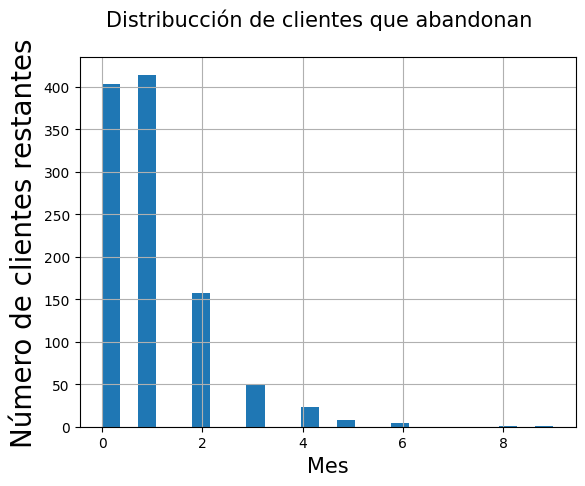

In [ ]:
gym_churn['lifetime'].hist(bins=25)
plt.suptitle("Distribucción de clientes que abandonan", fontsize=15)
plt.xlabel("Mes", fontsize=15)
plt.ylabel("Número de clientes restantes",fontsize=20);

Por distribución representada de clientes que abandonan, la mayoría de las personas se van en los primeros 2 meses.

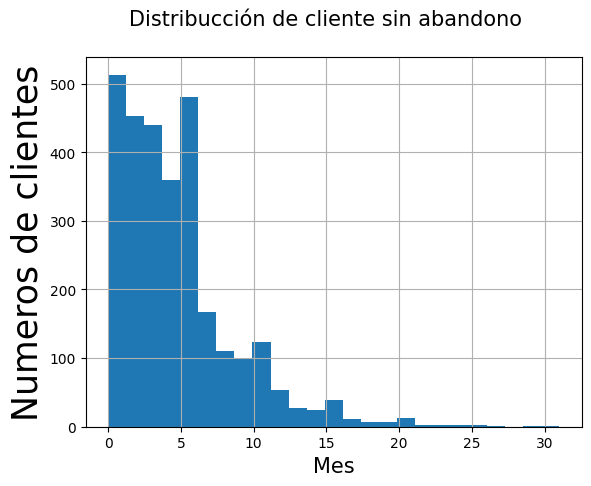

In [ ]:
gym_churn0['lifetime'].hist(bins=25)
plt.suptitle("Distribucción de cliente sin abandono", fontsize=15)
plt.xlabel("Mes", fontsize=15)
plt.ylabel("Numeros de clientes",fontsize=25);

Según la distribución representada lo clientes que no abandonan, la mayoría de las personas dura menos de 10 meses

**Crea una matriz de correlación y muéstrala.**

In [ ]:
x = gym[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']]
x.head()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,6,29,14.227470,5.0,3,0.020398,0.000000
1,12,31,113.202938,12.0,7,1.922936,1.910244
2,1,28,129.448479,1.0,2,1.859098,1.736502
3,12,33,62.669863,12.0,2,3.205633,3.357215
4,1,26,198.362265,1.0,3,1.113884,1.120078


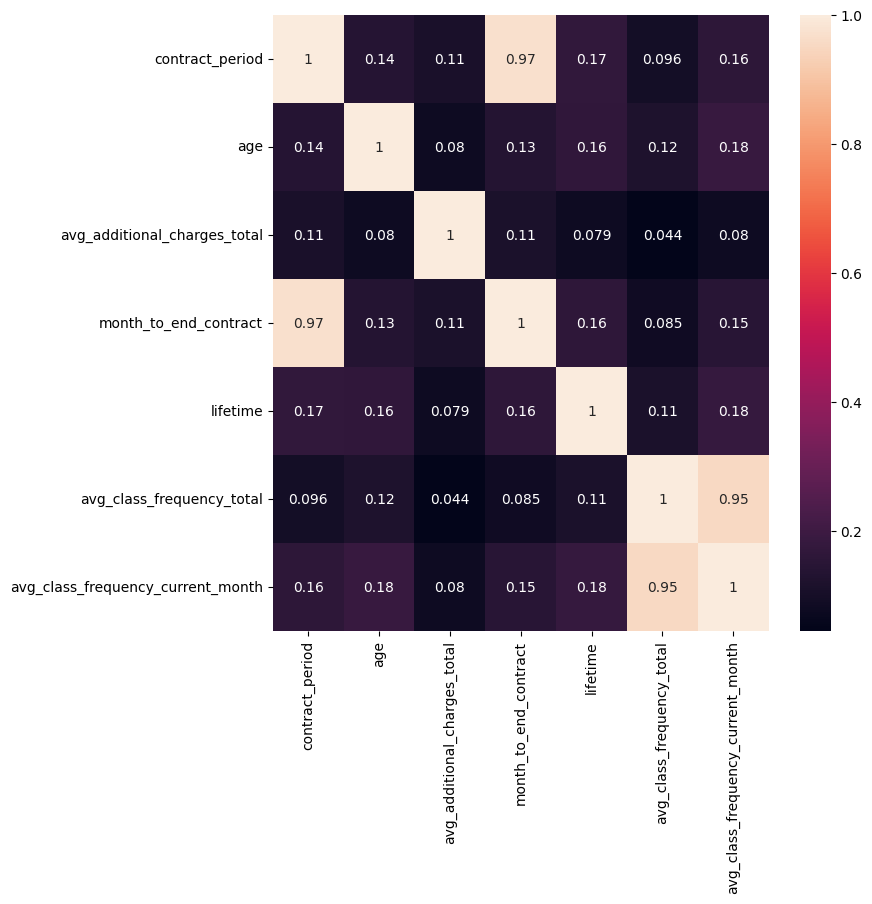

In [ ]:
matriz = x.corr()
plt.figure(figsize = (8,8))
sns.heatmap(matriz, annot = True)
plt.show()

Desde la matriz de correlación muestra, que podemos ver algunas conexiones de los usuarios de abandono y casi todas las características, excepto el sexo de los clientes y el teléfono.

In [ ]:
var_cuanti = gym[['contract_period','age','avg_additional_charges_total',
                  'month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']]

In [ ]:
var_cuali = ['churn', 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits' ]

In [ ]:
 for var in var_cuali:                          
        tabla = pd.crosstab(gym[var], gym['churn'])    
        _, p, _, _ = chi2_contingency(tabla)           
        if p < 0.05:
            print(f"{var} y churn tienen relación")    
        else:
            print(f"{var} y churn son independientes")

churn y churn tienen relación
gender y churn son independientes
near_location y churn tienen relación
partner y churn tienen relación
promo_friends y churn tienen relación
phone y churn son independientes
group_visits y churn tienen relación


In [ ]:
print(stats.pointbiserialr(gym['churn'],gym['contract_period']))
print(stats.pointbiserialr(gym['churn'],gym['age']))
print(stats.pointbiserialr(gym['churn'],gym['avg_additional_charges_total']))
print(stats.pointbiserialr(gym['churn'],gym['month_to_end_contract']))
print(stats.pointbiserialr(gym['churn'], gym['lifetime']))
print(stats.pointbiserialr(gym['churn'],gym['avg_class_frequency_total']))
print(stats.pointbiserialr(gym['churn'],gym['avg_class_frequency_current_month']))

SignificanceResult(statistic=-0.38998421158607816, pvalue=1.9181207976703736e-145)
SignificanceResult(statistic=-0.4047352528235899, pvalue=1.5144442927603887e-157)
SignificanceResult(statistic=-0.19869745106820344, pvalue=6.7593160681150375e-37)
SignificanceResult(statistic=-0.38139298369571506, pvalue=1.1257083299147718e-138)
SignificanceResult(statistic=-0.4382199684479804, pvalue=2.1611104975675896e-187)
SignificanceResult(statistic=-0.24971511133289487, pvalue=6.372846955985224e-58)
SignificanceResult(statistic=-0.4123483907072646, pvalue=4.894130319318656e-164)


Aquí podemos observar que tenemos una correlación negativa, debido que todos los valores de correlación son negativos, lo que indica que la correlación observada, si tiene una correlación efectiva entre si. 

# Conclusión Etapa 1 y 2 

 1. Tenemos 4000 lineas de datos de clientes
 2. Número casi igual de clientes de hombres y mujeres con una edad promedio de 29 años
 3. El 48% de los socias se inscribe al GYM, por el programa de empresa en convenio
 4. El 30% de los clientes se inscribieron originalmente a través del programa "Promo_friends".
 5. El 90% de los clientes proporciona sus números de teléfono
 6. El 55% de los clientes firmaron por 1 mes, el 20% por 6 meses y el 24% por 12 meses el contrato
 7. El 41% de los clientes participa en sesiones grupales
 8. El monto total gastado en otros servicios de gimnasio: cafetería, artículos deportivos, cosméticos, masajes, etc. es de 146 dólares
 9. La frecuencia media de visitas por semana respecto al mes anterior es de 1,76
 10. La frecuencia media de visitas por semana a lo largo de la vida del cliente es de 1,86
 11. Los datos no tienen valores o líneas faltantes
 12. El 26.5% de los clientes abandonan el gimnacio . El 39% de los clientes abandonan el primer mes y el 29.5 abandonan en el segundo mes, para el 3 mes se han hido el 82% de los clientes
 13. Desde la matriz de correlación muestra, que podemos ver algunas conexiones de los usuarios de abandono y casi todas las características, excepto el sexo de losclientes y el teléfono.

# Etapa 3 Construir un modelo para predecir la cancelación de usuarios

**Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().**

In [ ]:
# definir la función que generará nuestras métricas
def print_all_metrics(y_true, y_pred, y_proba, title = 'Clasificación de metricas'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [ ]:
# dividir los datos en características (la matriz X) y una variable objetivo (y)
X = gym.drop('churn', axis=1)
y = gym['churn']

In [ ]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Entrena el modelo en el set de entrenamiento con dos métodos:**

*   regresión logística
*   bosque aleatorio

In [ ]:
# crear un objeto StandardScaler y aplicarlo al conjunto de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
cuanti = ['contract_period','age','avg_additional_charges_total',
                     'month_to_end_contract','lifetime','avg_class_frequency_total',
                     'avg_class_frequency_current_month']

In [ ]:
X_train[cuanti] = scaler.fit_transform(X_train[cuanti])
X_test[cuanti] = scaler.transform(X_test[cuanti])

**Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?**

**Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo.**

In [ ]:
# define el algoritmo para el modelo de regresión logistica
modelo = LogisticRegression()
modelo.fit(X_train_st, y_train)
# usar el modelo de funcionamiento para hacer predicciones
lr_predictions = modelo.predict(X_test_st)
lr_probabilities = modelo.predict_proba(X_test_st)[:,1]
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas para regresión logística:')

Métricas para regresión logística:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


In [ ]:
# define el algoritmo para el nuevo modelo de bosque aleatorio
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train_st, y_train)
# usar el modelo de funcionamiento para hacer predicciones
rf_predictions = model.predict(X_test_st)
rf_probabilities = model.predict_proba(X_test_st)[:,1]
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Métricas para bosque aleatorio:')

Métricas para bosque aleatorio:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


Después de comparar los dos modelos, podemos ver que ambos modelos tienen puntajes de métricas casi idénticos, pero la regresión logística tiene un resultdo un poco mejor que el bosque aleatorio.

# Etapa 4 Crear clústeres de usuarios

*   Estandarizar los datos.
*   Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los de otros estudiantes. Sin embargo, en la vida real, nadie te dará tales pistas así que tendrás que decidir basándote en el gráfico del paso anterior.)
*   Mira los valores medios de característica para clústeres. ¿Hay algo que te llame la atención?
*   Traza distribuciones de características para los clústeres. ¿Notas algo?
*   Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales










In [ ]:
# estandarizar el conjunto de validación utilizando el método transform scaler
scaler = StandardScaler() # crear un objeto de clase scaler
X_sc = scaler.fit((gym.drop(columns = ['churn']))) # entrenar estandarizador

In [ ]:
# la estandarización obligatoria de los datos antes de pasarlos al algoritmo
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# Numero de grupo 5 
km = KMeans(n_clusters = 5)
# aplicando el algoritmo a los datos y formando un vector de clúster
labels = km.fit_predict(X_sc)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


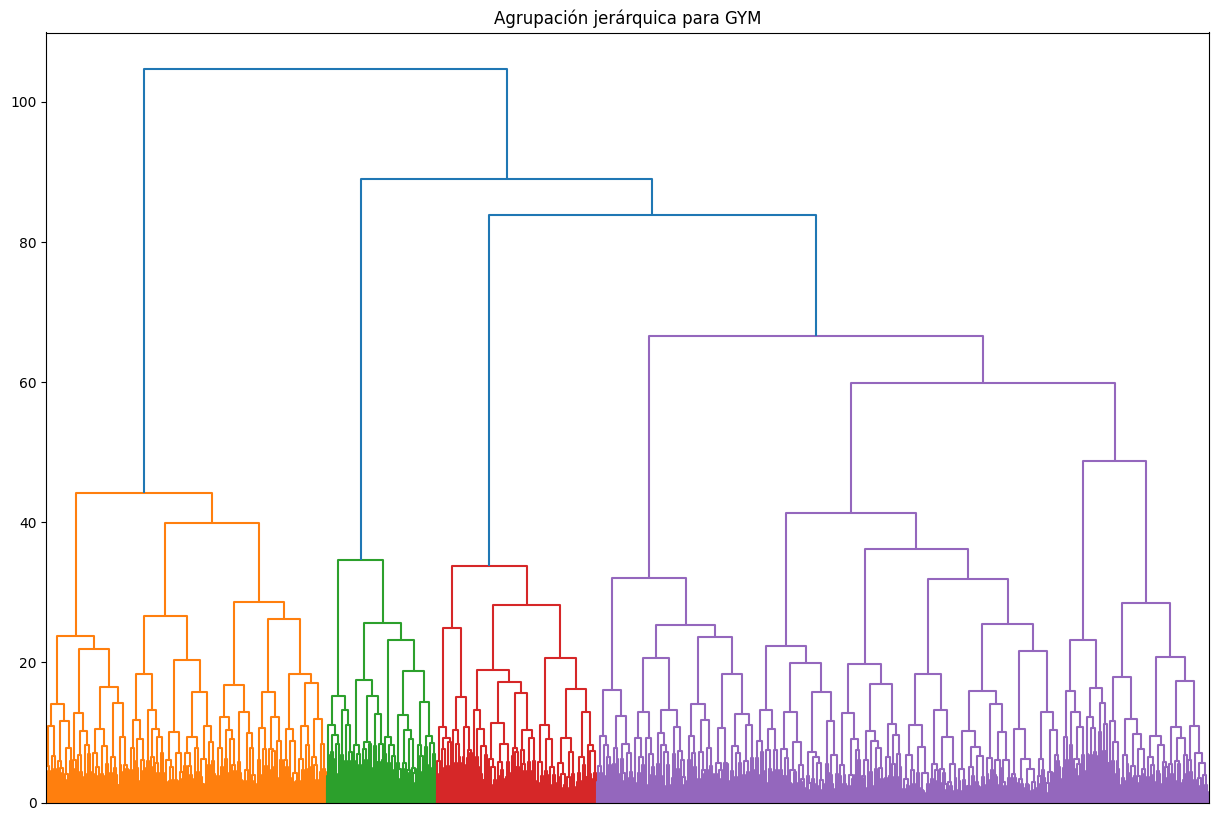

In [ ]:
# estandarización obligatoria de los datos antes de pasarlos al algoritmo
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.xticks([])
plt.show()

In [ ]:
# definir el modelo k_means con 5 clústeres
km = KMeans(n_clusters = 5,)

In [ ]:
# predecir los grupos para las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(X_sc)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# almacenar etiquetas de clúster en el campo de nuestro conjunto de datos
gym['cluster'] = labels

In [ ]:
# imprimir las estadísticas de los valores medios de las características por grupo
gym.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368
1,0.592838,0.970822,0.266578,0.099469,0.907162,2.863395,0.485411,30.198939,162.830042,2.629973,5.148541,2.908555,2.909754,0.063660
2,0.502137,0.944444,0.740385,0.487179,0.900641,11.884615,0.552350,29.910256,164.748340,10.881410,4.706197,1.992883,1.984530,0.022436
3,0.485179,0.998440,0.817473,1.000000,0.900156,3.143526,0.455538,29.182527,141.147858,2.906396,3.672387,1.720163,1.612149,0.249610
4,0.482667,1.000000,0.244444,0.017778,0.899556,1.977778,0.317333,28.240000,131.223110,1.895111,2.440000,1.291823,1.053661,0.521778


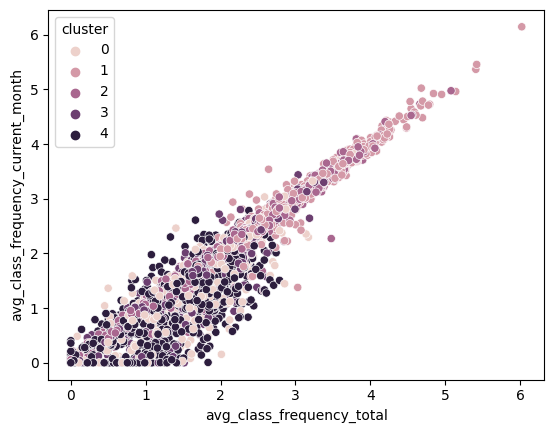

In [ ]:
sns.scatterplot(data=gym, x= 'avg_class_frequency_total', y= 'avg_class_frequency_current_month', hue = 'cluster');

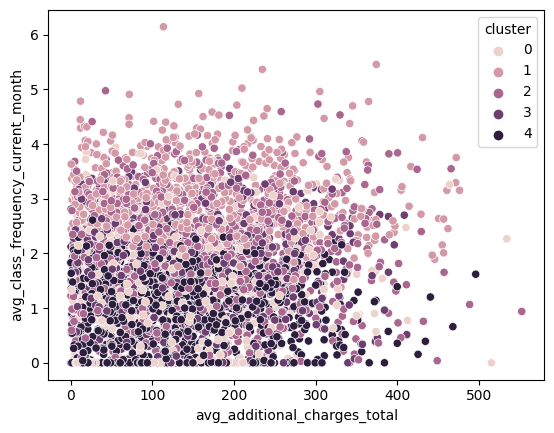

In [ ]:
sns.scatterplot(data=gym, x= 'avg_additional_charges_total', y= 'avg_class_frequency_current_month', hue = 'cluster');

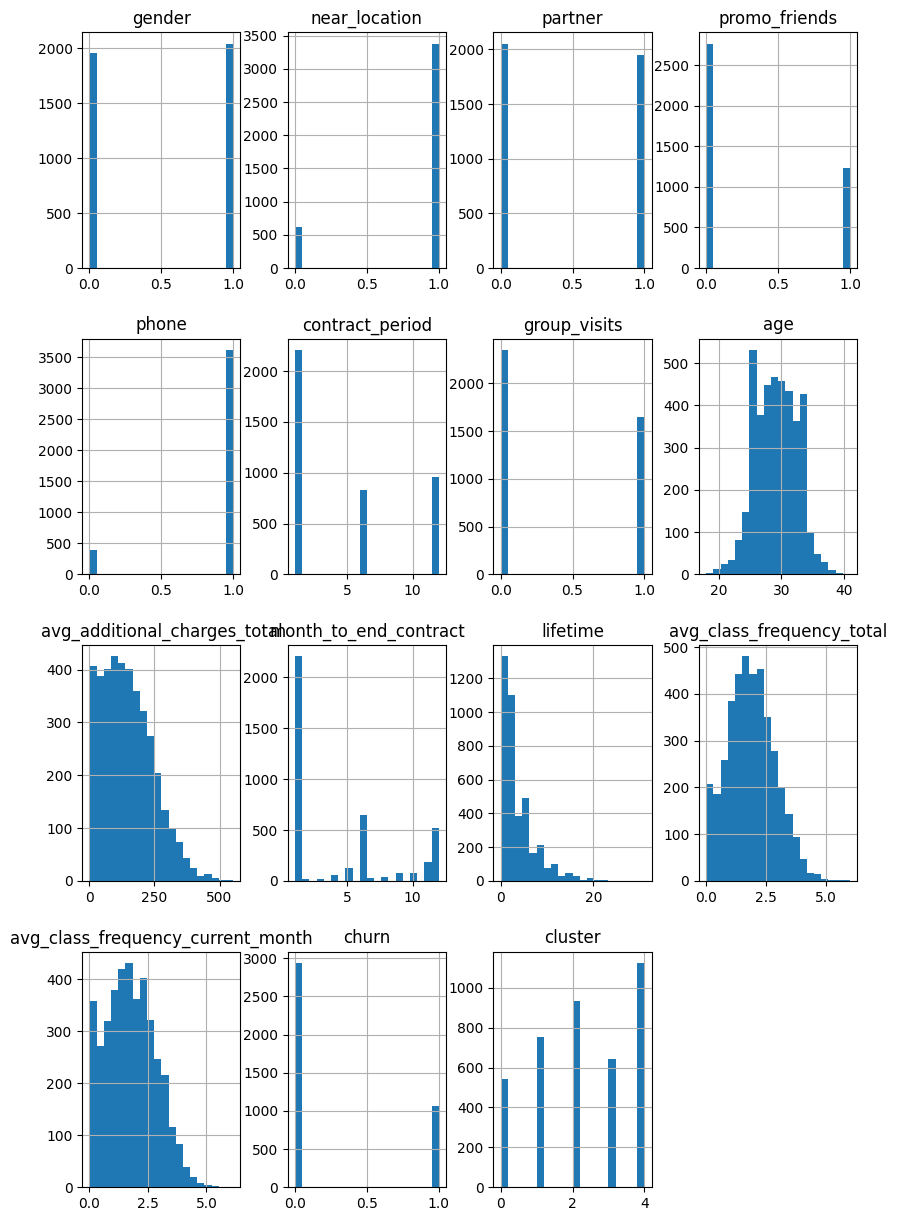

In [ ]:
gym.hist(bins=20,figsize=(10,15));

Caracteristicas de los valores medios de los clústeres

Para el clúster 4 tiene un 52% de abandono del GYM, y sus caracteristicas son:

*   Frecuencia media de visitas por semana durante el mes en curso es de 1 
*   Frecuencia media de visitas por semana a lo largo de la vida del cliente es de 1.2
*   El tiempo (meses) desde que el usuario llegó por primera vez al gimnasio es de 2.4
*   Los meses que faltan hasta que expire el contrato es de 1.8
*   Cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc. es de 131 dolares 
*   El usuario participa en sesiones grupales es de 0.31
*   Tiempo del Contrato (1 mes, 3 meses, 6 meses o 1 año) es de 1.9 Meses   









Para los clústeres 1 y 2  tienen entre un 2% a un 6% de abandono del GYM, siendos los mejores cluster y sus caracteristicas son:

*   Frecuencia media de visitas por semana durante el mes en curso es de 1,9
*   Frecuencia media de visitas por semana a lo largo de la vida del cliente es de 1.9
*   El tiempo (meses) desde que el usuario llegó por primera vez al gimnasio es de 4.7
*   Cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc. es de 164 dolares 
*   El usuario participa en sesiones grupales es de 55% 
*   Si el usuario vive o trabaja en el vecindario es de 94%

# Etapa 5. Saca conclusiones y haz recomendaciones básicas sobre trabajar con clientes

**Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.**

**No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.**

Después de investigar y analizar los datos representados de los clientes de la cadena de gimnasios, con algoritmos estadísticos y de aprendizaje automático, todos los usuarios se dividieron en 5 grupos principales (grupos), denominados 0,1,2,3,4.

Recomendaciones para el no abandono de clientes en el gimnasio son las siguientes:

*   Cuando la frecuencia promedio de clases de una persona para el mes actual es 1 o menos, se le debe llamar telefónicamente, y preguntar porque no esta asistiendo, de esas respuestas de pueden sacar muchas conclusiones para mejoras, además de hacerle una invitación a seguir entrenando.
*   Realizar seguimiento a las personas que tengan menos de dos meses hasta el final del contrato del gimnasio. Tal vez se puedan ofrecer entrenamientos personales gratuitos, o clases extraordinarias grupales.
*   Los clientes que gasten menos de 131 dólares, pueden ser invitados a algunas clases de entrenamiento de nutrición saludable o deportiva con algunas ventas de productos extras en el gimnasio.
*   A los clientes que contraten por 1 o 2 meses, se les puede ofrecer descuentos para la renovación del contrato en el gimnasio.








